In [31]:
import numpy as np
import pandas as pd
import scanpy.api as sc

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
head = lambda x, n = 6: x[:n]
tail = lambda x, n = 6: x[-n:]

In [3]:
path = './data/pbmc3k_filtered_gene_bc_matrices/hg19/'
adata = sc.read(path + 'matrix.mtx', cache=True).T  # transpose the data
adata.var_names = pd.read_csv(path + 'genes.tsv', header=None, sep='\t')[1]
adata.obs_names = pd.read_csv(path + 'barcodes.tsv', header=None)[0]

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
adata.var_names_make_unique()

In [5]:
adata.var_names

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2-1', 'AL590523.1', 'CT476828.1', 'PNRC2-1', 'SRSF10-1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', length=32738)

In [6]:
adata.obs_names

Index(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1',
       'AAACCGTGCTTCCG-1', 'AAACCGTGTATGCG-1', 'AAACGCACTGGTAC-1',
       'AAACGCTGACCAGT-1', 'AAACGCTGGTTCTT-1', 'AAACGCTGTAGCCA-1',
       'AAACGCTGTTTCTG-1',
       ...
       'TTTCAGTGTCACGA-1', 'TTTCAGTGTCTATC-1', 'TTTCAGTGTGCAGT-1',
       'TTTCCAGAGGTGAG-1', 'TTTCGAACACCTGA-1', 'TTTCGAACTCTCAT-1',
       'TTTCTACTGAGGCA-1', 'TTTCTACTTCCTCG-1', 'TTTGCATGAGAGGC-1',
       'TTTGCATGCCTCAC-1'],
      dtype='object', name=0, length=2700)

In [7]:
X_raw = adata.X.toarray()

In [8]:
print(adata.shape)
print(X_raw.shape)

(2700, 32738)
(2700, 32738)


-----

**Filter out cells / observations that express less than 200 genes**

In [9]:
sc.pp.filter_cells(adata, min_genes=200)
adata.shape

(2700, 32738)

**Filter out genes that expressed less than 3 cells**

In [10]:
sc.pp.filter_genes(adata, min_cells=3)
adata.shape

(2700, 13714)

-----

In [11]:
X_raw

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**For each row (cells), filtered out the rows with more than 200 zeros**

In [12]:
x = np.apply_along_axis(lambda x: np.sum(x != 0), 1, X_raw)
print(x.shape)

(2700,)


In [13]:
np.sum(x >= 200) # 2700 -> all cells express more than 200 genes

2700

**For each column (genes), filtered out the columns with more than 3 zeros**

In [14]:
y = np.apply_along_axis(lambda x: np.sum(x != 0), 0, X_raw)
print(y.shape)

(32738,)


In [15]:
np.sum(y >= 3) # 13714

13714

**The results is the same for filter_gene and filter_cell**

In [19]:
X = X_raw
print("Before filtered...", X.shape)
X = X[x >= 200, :][:, y >= 3]
print("After  filtered...", X.shape)

Before filtered... (2700, 32738)
After  filtered... (2700, 13714)


In [20]:
adata.shape

(2700, 13714)

**Visualization**

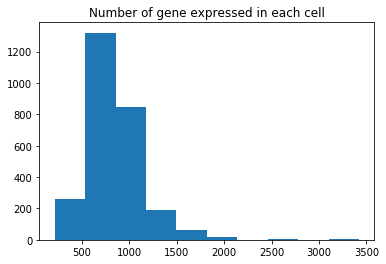

In [67]:
plt.hist(x)
plt.title("Number of gene expressed in each cell")
plt.show()

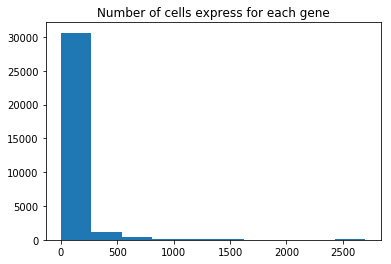

In [66]:
plt.hist(y)
plt.title("Number of cells express for each gene")
plt.show()

-----

# Try Sklearn Preprocessing

## Standardization

In [21]:
X_filtered = adata.X.toarray()

In [22]:
X_scaled = preprocessing.scale(X_filtered)

/opt/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [23]:
X_scaled

array([[-0.0578307 , -0.03335165, -0.04307361, ..., -0.05451444,
        -0.20127633, -0.16080415],
       [-0.0578307 , -0.03335165, -0.04307361, ..., -0.05451444,
        -0.20127633, -0.16080415],
       [-0.0578307 , -0.03335165, -0.04307361, ..., -0.05451444,
        -0.20127633, -0.16080415],
       ...,
       [-0.0578307 , -0.03335165, -0.04307361, ..., -0.05451444,
        -0.20127633, -0.16080415],
       [-0.0578307 , -0.03335165, -0.04307361, ..., 18.344088  ,
        -0.20127633, -0.16080415],
       [-0.0578307 , -0.03335165, -0.04307361, ..., -0.05451444,
        -0.20127633, -0.16080415]], dtype=float32)

In [24]:
(X_filtered - X_filtered.mean(axis=0)) / X_filtered.std(axis=0)

array([[-0.05783072, -0.03335199, -0.04307319, ..., -0.05451437,
        -0.20127653, -0.16080426],
       [-0.05783072, -0.03335199, -0.04307319, ..., -0.05451437,
        -0.20127653, -0.16080426],
       [-0.05783072, -0.03335199, -0.04307319, ..., -0.05451437,
        -0.20127653, -0.16080426],
       ...,
       [-0.05783072, -0.03335199, -0.04307319, ..., -0.05451437,
        -0.20127653, -0.16080426],
       [-0.05783072, -0.03335199, -0.04307319, ..., 18.344088  ,
        -0.20127653, -0.16080426],
       [-0.05783072, -0.03335199, -0.04307319, ..., -0.05451437,
        -0.20127653, -0.16080426]], dtype=float32)

check the mean and standard deviation

In [25]:
X_scaled.mean(axis=0)

array([-7.4756919e-08,  5.0651806e-07, -1.6198114e-09, ...,
       -2.3613511e-07, -7.2971538e-08, -7.2320304e-08], dtype=float32)

In [26]:
X_scaled.std(axis=0)

array([0.99999887, 1.0000061 , 1.0000035 , ..., 0.9999991 , 1.0000032 ,
       1.0000175 ], dtype=float32)

plot the results

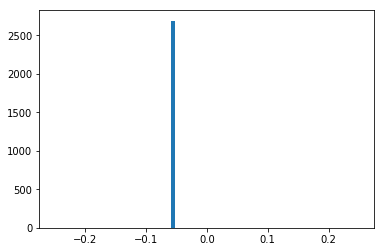

In [50]:
plt.hist(X_scaled[:, 0], bins = np.linspace(-0.25, 0.25, 100))
plt.show()

In [51]:
X_scaled[:, 0]

array([-0.0578307, -0.0578307, -0.0578307, ..., -0.0578307, -0.0578307,
       -0.0578307], dtype=float32)

## Scaling Features to a range

In [28]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [29]:
X_minmax = min_max_scaler.fit_transform(X_filtered)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)